# Creation of custom map
1. Creating conda environment
2. conda install -c conda-forge gdal
3. Install the rest of the python packages such as geopands and geoplot
### GDAL for custom swiss canton and world map
Using natural earth country 1:50m map data from their [website](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/), I created map with custom properties using command line gdal. The custom properties are SOVEREIGNT, TYPE, etc. Here the command line code. Go inzo map folder. 
```console
ogr2ogr -f GeoJSON -select "SOVEREIGNT","TYPE","NAME","ADM0_A3","UN_A3" world_countries.geojson ne_50m_admin_0_countries.shp
ogr2ogr -f GeoJSON -where "adm0_a3 in ('CHE')" -select "type_en","name","iso_3166_2" switzerland_cantons.geojson ne_10m_admin_1_states_provinces.shp
```
### Data import

In [434]:
import json 
import pandas as pd
import numpy as np
import geopandas as gpd
#import geoplot
from shapely.geometry import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.ops import cascaded_union
from shapely.ops import unary_union


# conda create --name geo_map python=3.9
# conda activate geo_map
# conda install -c conda-forge gdal
# ogr2ogr -f GeoJSON -select "SOVEREIGNT","TYPE","NAME","ADM0_A3","UN_A3" world_countries.geojson ne_50m_admin_0_countries.shp
# conda install geoplot -c conda-forge
# conda install -c conda-forge numpy
# conda install topojson -c conda-forge

In [435]:
# Hand-selected M49 codes from UNDESA data, which are not regions (such as Africa) or economic zones (such as "developed" countries)
M49 = [108,174,262,232,231,404,450,454,480,175,508,638,646,690,706,728,800,834,894,716,24,120,140,148,178,180,226,266,678,12,818,434,504,729,788,732,72,748,426,516,710,204,854,132,384,270,288,324,624,430,466,478,562,566,654,686,694,768,398,417,762,795,860,156,344,446,158,408,392,496,410,96,116,360,418,458,104,608,702,764,626,704,4,50,64,356,364,462,524,586,144,51,31,48,196,268,368,376,400,414,422,512,634,682,275,760,792,784,887,112,100,203,348,616,498,642,643,703,804,830,208,233,234,246,352,372,833,428,440,578,752,826,8,20,70,191,292,300,336,380,470,499,807,620,674,688,705,724,40,56,250,276,438,442,492,528,756,660,28,533,44,52,535,92,136,192,531,212,214,308,312,332,388,474,500,630,652,659,662,663,670,534,780,796,850,84,188,222,320,340,484,558,591,32,68,76,152,170,218,238,254,328,600,604,740,858,862,60,124,304,666,840,36,554,242,540,598,90,548,316,296,584,583,520,580,585,16,184,258,570,882,772,776,798,876]
# Hand-selected M49 codes for regions from UNDESA data set
regions = {
     "AFRICA": [108,174,262,232,231,404,450,454,480,175,508,638,646,690,706,728,800,834,894,716,24,120,140,148,178,180,226,266,678,12,818,434,504,729,788,732,72,748,426,516,710,204,854,132,384,270,288,324,624,430,466,478,562,566,654,686,694,768],
     "ASIA": [398,417,762,795,860,156,344,446,158,408,392,496,410,96,116,360,418,458,104,608,702,764,626,704,4,50,64,356,364,462,524,586,144,51,31,48,196,268,368,376,400,414,422,512,634,682,275,760,792,784,887],
     "EUROPE": [112,100,203,348,616,498,642,643,703,804,830,208,233,234,246,352,372,833,428,440,578,752,826,8,20,70,191,292,300,336,380,470,499,807,620,674,688,705,724,40,56,250,276,438,442,492,528,756],
     "LATIN AMERICA AND THE CARIBBEAN":[660,28,533,44,52,535,92,136,192,531,212,214,308,312,332,388,474,500,630,652,659,662,663,670,534,780,796,850,84,188,222,320,340,484,558,591,32,68,76,152,170,218,238,254,328,600,604,740,858,862],
     "NORTHERN AMERICA": [60,124,304,666,840],
     "OCEANIA": [36,554,242,540,598,90,548,316,296,584,583,520,580,585,16,184,258,570,882,772,776,798,876]
}

# Opening files
mapNaturalEarthGeopandas = gpd.read_file("../data_world/map/world_countries.geojson")
mapCantons = gpd.read_file("../data_world/map/switzerland_cantons.geojson")

### Creating country map

#### Treat countries part of Natural Earth, but not UNDESA

In [436]:
# Identify countries which are part of Natural Earth, but not of the UNDESA data set
for indx, values in mapNaturalEarthGeopandas["UN_A3"].items():
    if int(values) not in M49:
        print('index: ', indx, '\tvalue: ', int(values), '\tname:', mapNaturalEarthGeopandas["NAME"][indx])

index:  17 	value:  -99 	name: S. Geo. and the Is.
index:  18 	value:  -99 	name: Br. Indian Ocean Ter.
index:  20 	value:  612 	name: Pitcairn Is.
index:  28 	value:  832 	name: Jersey
index:  29 	value:  831 	name: Guernsey
index:  45 	value:  -99 	name: Taiwan
index:  58 	value:  -99 	name: Somaliland
index:  88 	value:  -99 	name: Norway
index:  130 	value:  -99 	name: Kosovo
index:  167 	value:  260 	name: Fr. S. Antarctic Lands
index:  168 	value:  248 	name: Åland
index:  185 	value:  -99 	name: N. Cyprus
index:  226 	value:  -99 	name: Indian Ocean Ter.
index:  227 	value:  -99 	name: Heard I. and McDonald Is.
index:  228 	value:  574 	name: Norfolk Island
index:  229 	value:  -99 	name: Ashmore and Cartier Is.
index:  238 	value:  -99 	name: Siachen Glacier
index:  239 	value:  10 	name: Antarctica


In [437]:
# DISCARD directly these countries as they have no people 
# living in them and/or are not important
discard_indx = [17, 18, 20, 167, 226, 227, 228, 229, 239]

# RENAME Taiwan (indx:45) and Norway (indx:45) to correct UN_A3
rename_indx = [45, 88]
rename_UN_A3_code = [158, 578]
for indx, UN_code in zip(rename_indx, rename_UN_A3_code):
    mapNaturalEarthGeopandas.at[indx,'UN_A3'] = UN_code

# MERGE adjacent countries according to UN mapping
# The first index in each tuple is the disputed area 
# to be integrated in a sovereign state
merge_indx = [(58, 57), (130, 65), (185, 186), (238, 144)]
""" 
indx name -> UN_A3-to-be-merged-to
-----
58 Somaliland -> 706
57 Somalia -> 706
-----
130 Kosovo -> 688
65 Serbia -> 688
-----
185 N. Cyprus -> 196
186 Cyprus -> 196
-----
238 Siachen Glacier 356
144 India 356 
"""
for disputed_indx,sovereign_indx in merge_indx:
    merged_polygon = cascaded_union([mapNaturalEarthGeopandas.at[disputed_indx,'geometry'], 
                    mapNaturalEarthGeopandas.at[sovereign_indx,'geometry']])
    mapNaturalEarthGeopandas.at[sovereign_indx, 'geometry'] = merged_polygon
    # Ignore diputed countries
    discard_indx.append(disputed_indx)

# COMBINE
"""
indx name -> UN_A3-to-be-merged-to
-----
28 Jersey -> 830
29 Guernsey -> 830 
"""
combined_multipolygon_channel_islands = unary_union([mapNaturalEarthGeopandas.at[29, 'geometry'], mapNaturalEarthGeopandas.at[28, 'geometry']])
# Overwrite Jersey
# There is no three letter code for the Channel Islands
# so I used JEY, as Jersey is population-wise the largest island
mapNaturalEarthGeopandas.at[28, 'TYPE'] = "Dependency"
mapNaturalEarthGeopandas.at[28, 'NAME'] = "Channel Islands"
mapNaturalEarthGeopandas.at[28, 'UN_A3'] = "830"
mapNaturalEarthGeopandas.at[28, 'geometry'] = combined_multipolygon_channel_islands
# Ignore Guernsey
discard_indx.append(29)
""" 
-----
168 Aland -> 246
169 Finland -> 246
----- 
"""
combined_multipolygon_finland = unary_union([mapNaturalEarthGeopandas.at[168, 'geometry'], mapNaturalEarthGeopandas.at[169, 'geometry']])
# Overwrite Finland geometry
mapNaturalEarthGeopandas.at[169, 'geometry'] = combined_multipolygon_finland
# Ignore Aland
discard_indx.append(168)

C:\Users\cmnue\AppData\Local\Temp\ipykernel_24976\1819877077.py:31: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  merged_polygon = cascaded_union([mapNaturalEarthGeopandas.at[disputed_indx,'geometry'],


In [438]:
# Remove countries to be ignored from the dataframe
print(discard_indx)
mapNaturalEarthGeopandas = mapNaturalEarthGeopandas.drop(discard_indx)

[17, 18, 20, 167, 226, 227, 228, 229, 239, 58, 130, 185, 238, 29, 168]


In [439]:
# Check if all countries were treated. There should be nothing printed.
for indx, values in mapNaturalEarthGeopandas["UN_A3"].items():
    if int(values) not in M49:
        print('index: ', indx, '\tvalue: ', int(values), '\tname:', mapNaturalEarthGeopandas["NAME"][indx])

#### Treat countries part of UNDESA, but not Natural Earth

In [440]:
# Identify countries/regions which are part of UNDESA, but not of Natural Earth in the same way
mapNaturalEarthM49 = list(map(int, mapNaturalEarthGeopandas["UN_A3"].tolist()))
for values in M49:
    if values not in mapNaturalEarthM49:
        print('value: ', values)

value:  175
value:  638
value:  292
value:  535
value:  312
value:  474
value:  254
value:  772


In [441]:
"""
Analysis
value:  175 -> Mayotte -> 3 (France)
value:  638 -> Reunion -> 4 (France)
value:  158 -> Taiwan -> Was solved previously
value:  830 -> Channel Islands -> Was solved previously
value:  578 -> Norway -> Was solved previously
value:  292 -> Gibraltar -> Made polygon myself 
value:  535 -> Bonaire, Sint Eustatius and Saba -> 9, 10, 11 (Netherlands)
value:  312 -> Guadeloupe -> 6,7,8 (France)
value:  474 -> Martinique -> 5 (France)
value:  254 -> French Guiana -> 9 (France)
value:  772 -> Tokelau -> 11,12 (New Zealand)
"""

'\nAnalysis\nvalue:  175 -> Mayotte -> 3 (France)\nvalue:  638 -> Reunion -> 4 (France)\nvalue:  158 -> Taiwan -> Was solved previously\nvalue:  830 -> Channel Islands -> Was solved previously\nvalue:  578 -> Norway -> Was solved previously\nvalue:  292 -> Gibraltar -> Made polygon myself \nvalue:  535 -> Bonaire, Sint Eustatius and Saba -> 9, 10, 11 (Netherlands)\nvalue:  312 -> Guadeloupe -> 6,7,8 (France)\nvalue:  474 -> Martinique -> 5 (France)\nvalue:  254 -> French Guiana -> 9 (France)\nvalue:  772 -> Tokelau -> 11,12 (New Zealand)\n'

In [442]:
# Make Gibraltar polygon myself using geojson.io
polygonGibraltar = Polygon([[-5.360971162085576,36.13494650542253],[-5.344882058014377,36.10819878386461],[-5.339027641595891,36.1531867080983],[-5.354583662365229,36.15534764069352],[-5.360971162085576,36.13494650542253]])
print(polygonGibraltar)
dfGibraltar = gpd.GeoDataFrame({"SOVEREIGNT":"United Kingdom",
                                 "TYPE":"Dependency",
                                 "NAME":"Gibraltar",
                                 "ADM0_A3":"GIB",
                                 "UN_A3":"292",
                                 "geometry":polygonGibraltar},
                               index=[mapNaturalEarthGeopandas.last_valid_index()+1])
mapNaturalEarthGeopandas = pd.concat([mapNaturalEarthGeopandas, dfGibraltar])

POLYGON ((-5.360971162085576 36.13494650542253, -5.344882058014377 36.10819878386461, -5.339027641595891 36.1531867080983, -5.354583662365229 36.15534764069352, -5.360971162085576 36.13494650542253))


c:\Users\cmnue\miniconda3\envs\geo_map\lib\site-packages\geopandas\array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


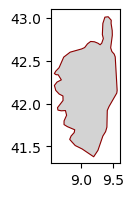

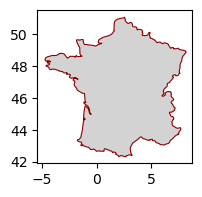

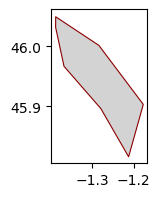

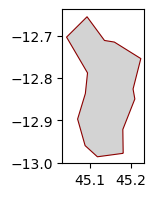

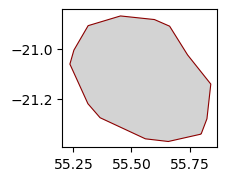

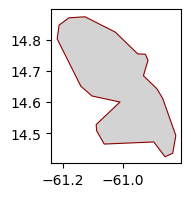

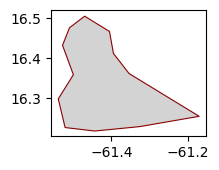

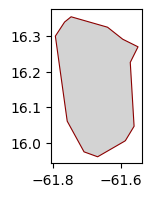

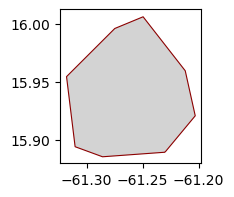

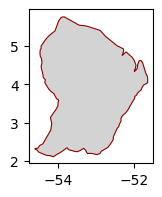

In [443]:
# Visualizing the islands of France
index = mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).index
for i in index:
    mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).iloc[[i], :].plot(edgecolor='darkred', facecolor='lightgrey',
    linewidth=.8,
    figsize=(2, 2))

In [444]:
# Treat French terrretories
indxListFrance = list(mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).index)
## Mayotte
polygonMayotte = mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).at[3,"geometry"]
dfMayotte = gpd.GeoDataFrame({"SOVEREIGNT":"France",
                                 "TYPE":"Dependency",
                                 "NAME":"Mayotte",
                                 "ADM0_A3":"MYT",
                                 "UN_A3":"175",
                                 "geometry":polygonMayotte},
                               index=[mapNaturalEarthGeopandas.last_valid_index()+1])
mapNaturalEarthGeopandas = pd.concat([mapNaturalEarthGeopandas, dfMayotte])
## Reunion 
polygonReunion = mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).at[4,"geometry"]
dfReunion = gpd.GeoDataFrame({"SOVEREIGNT":"France",
                                 "TYPE":"Dependency",
                                 "NAME":"Reunion",
                                 "ADM0_A3":"REU",
                                 "UN_A3":"638",
                                 "geometry":polygonReunion},
                               index=[mapNaturalEarthGeopandas.last_valid_index()+1])
mapNaturalEarthGeopandas = pd.concat([mapNaturalEarthGeopandas, dfReunion])
## Guadeloupe
polygonsGuadeloupe = []
for i in [6,7,8]:
    polygonsGuadeloupe.append(mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).at[i,"geometry"])
multiPolygonGuadeloupe = MultiPolygon(polygonsGuadeloupe)
dfGuadeloupe = gpd.GeoDataFrame({"SOVEREIGNT":"France",
                                 "TYPE":"Dependency",
                                 "NAME":"Guadeloupe",
                                 "ADM0_A3":"GLP",
                                 "UN_A3":"312",
                                 "geometry":multiPolygonGuadeloupe},
                               index=[mapNaturalEarthGeopandas.last_valid_index()+1])
mapNaturalEarthGeopandas = pd.concat([mapNaturalEarthGeopandas, dfGuadeloupe])
## Martinique
polygonMartinique = mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).at[5,"geometry"]
dfMartinique = gpd.GeoDataFrame({"SOVEREIGNT":"France",
                                 "TYPE":"Dependency",
                                 "NAME":"Martinique",
                                 "ADM0_A3":"MTQ",
                                 "UN_A3":"474",
                                 "geometry":polygonMartinique},
                               index=[mapNaturalEarthGeopandas.last_valid_index()+1])
mapNaturalEarthGeopandas = pd.concat([mapNaturalEarthGeopandas, dfMartinique])
## French Guiana
polygonFrenchGuiana = mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).at[9,"geometry"]
dfFrenchGuiana = gpd.GeoDataFrame({"SOVEREIGNT":"France",
                                 "TYPE":"Dependency",
                                 "NAME":"French Guiana",
                                 "ADM0_A3":"GUF",
                                 "UN_A3":"254",
                                 "geometry":polygonFrenchGuiana},
                               index=[mapNaturalEarthGeopandas.last_valid_index()+1])
mapNaturalEarthGeopandas = pd.concat([mapNaturalEarthGeopandas, dfFrenchGuiana])
# Treat mainland France, overwrite French polygon
polygonsFrance = []
for i in [x for x in indxListFrance if x not in [3,4,5,6,7,8,9]]:
  polygonsFrance.append(mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).at[i,"geometry"])
multiPolygonFrance = MultiPolygon(polygonsFrance)
mapNaturalEarthGeopandas.at[160, "geometry"] = multiPolygonFrance

c:\Users\cmnue\miniconda3\envs\geo_map\lib\site-packages\geopandas\array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
c:\Users\cmnue\miniconda3\envs\geo_map\lib\site-packages\geopandas\array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
c:\Users\cmnue\miniconda3\envs\geo_map\lib\site-packages\geopandas\array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))
c:\Users\cmnue\miniconda3\envs\geo_map\lib\site-packages\geopandas\array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the 

In [445]:
mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "528"].explode(ignore_index=True)

,SOVEREIGNT,TYPE,NAME,ADM0_A3,UN_A3,geometry
0,Netherlands,Country,Netherlands,NLD,528,"POLYGON ((5.99395 50.75044, 5.89246 50.75256, ..."
1,Netherlands,Country,Netherlands,NLD,528,"POLYGON ((4.22617 51.38647, 4.21143 51.34873, ..."
2,Netherlands,Country,Netherlands,NLD,528,"POLYGON ((6.33340 53.51074, 6.19326 53.47681, ..."
3,Netherlands,Country,Netherlands,NLD,528,"POLYGON ((5.92930 53.45884, 5.73203 53.44263, ..."
4,Netherlands,Country,Netherlands,NLD,528,"POLYGON ((5.10859 53.30801, 4.92373 53.23457, ..."
5,Netherlands,Country,Netherlands,NLD,528,"POLYGON ((5.32578 53.38574, 5.23262 53.37778, ..."
6,Netherlands,Country,Netherlands,NLD,528,"POLYGON ((4.88613 53.07070, 4.78711 52.99980, ..."
7,Netherlands,Country,Netherlands,NLD,528,"POLYGON ((3.94912 51.73945, 4.04678 51.68491, ..."
8,Netherlands,Country,Netherlands,NLD,528,"POLYGON ((6.73477 53.58252, 6.64209 53.57920, ..."
9,Netherlands,Country,Netherlands,NLD,528,"POLYGON ((-68.20581 12.14458, -68.25435 12.032..."


In [446]:
# Treat Dutch terrretories 
polygonsDutchIslands = []
for i in [9,10,11]:
  polygonsDutchIslands.append(mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "528"].explode(ignore_index=True).at[i,"geometry"])
multiPolygonDutchIslands = MultiPolygon(polygonsDutchIslands)
dfDutchIslands = gpd.GeoDataFrame({"SOVEREIGNT":"Netherlands",
                                 "TYPE":"Dependency",
                                 "NAME":"Bonaire, Sint Eustatius and Saba",
                                 "ADM0_A3":"BES",
                                 "UN_A3":"535",
                                 "geometry":multiPolygonDutchIslands},
                               index=[mapNaturalEarthGeopandas.last_valid_index()+1])
mapNaturalEarthGeopandas = pd.concat([mapNaturalEarthGeopandas, dfDutchIslands])
# Treat mainland Netherlands
indxListNetherlands = list(mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "528"].explode(ignore_index=True).index)
polygonsNetherlands = []
for i in [x for x in indxListNetherlands if x not in [9,10,11]]:
  polygonsNetherlands.append(mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "528"].explode(ignore_index=True).at[i,"geometry"])
multiPolygonNetherlands = MultiPolygon(polygonsNetherlands)
mapNaturalEarthGeopandas.at[96, "geometry"] = multiPolygonNetherlands

c:\Users\cmnue\miniconda3\envs\geo_map\lib\site-packages\geopandas\array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


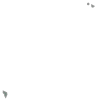

In [447]:
multiPolygonDutchIslands

In [448]:
# Treat New Zealand
polygonsTokelau = []
for i in [11,12]:
    polygonsTokelau.append(mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "554"].explode(ignore_index=True).at[i,"geometry"])
multiPolygonTokelau = MultiPolygon(polygonsTokelau)
dfTokelau = gpd.GeoDataFrame({"SOVEREIGNT":"New Zealand",
                                 "TYPE":"Dependency",
                                 "NAME":"Tokelau",
                                 "ADM0_A3":"TKL",
                                 "UN_A3":"772",
                                 "geometry":multiPolygonTokelau},
                               index=[mapNaturalEarthGeopandas.last_valid_index()+1])
mapNaturalEarthGeopandas = pd.concat([mapNaturalEarthGeopandas, dfTokelau])
# Treat mainland New Zealand
indxListNewZealand = list(mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "554"].explode(ignore_index=True).index)
polygonsNewZealand = []
for i in [x for x in indxListNewZealand if x not in [11,12]]:
  polygonsNewZealand.append(mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "554"].explode(ignore_index=True).at[i,"geometry"])
multiPolygonNewZealand = MultiPolygon(polygonsNewZealand)
mapNaturalEarthGeopandas.at[93, "geometry"] = multiPolygonNewZealand

c:\Users\cmnue\miniconda3\envs\geo_map\lib\site-packages\geopandas\array.py:1470: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  return GeometryArray(data, crs=_get_common_crs(to_concat))


In [449]:
# Check whether modifications seem to make sense
mapNaturalEarthGeopandas.tail(20)

,SOVEREIGNT,TYPE,NAME,ADM0_A3,UN_A3,geometry
224,Austria,Sovereign country,Austria,AUT,040,"POLYGON ((9.52754 47.27075, 9.60908 47.39180, ..."
225,Australia,Country,Australia,AUS,036,"MULTIPOLYGON (((143.17891 -11.95449, 143.15293..."
230,Armenia,Sovereign country,Armenia,ARM,051,"MULTIPOLYGON (((44.76826 39.70352, 44.73379 39..."
231,Argentina,Sovereign country,Argentina,ARG,032,"MULTIPOLYGON (((-57.60889 -30.18779, -57.64575..."
232,Antigua and Barbuda,Sovereign country,Antigua and Barb.,ATG,028,"MULTIPOLYGON (((-61.71606 17.03701, -61.74814 ..."
233,Angola,Sovereign country,Angola,AGO,024,"MULTIPOLYGON (((13.07275 -4.63477, 13.05732 -4..."
234,Andorra,Sovereign country,Andorra,AND,020,"POLYGON ((1.70605 42.50332, 1.67852 42.49668, ..."
235,Algeria,Sovereign country,Algeria,DZA,012,"POLYGON ((8.57656 36.93721, 8.59766 36.88389, ..."
236,Albania,Sovereign country,Albania,ALB,008,"POLYGON ((19.34238 41.86909, 19.34551 41.91885..."
237,Afghanistan,Sovereign country,Afghanistan,AFG,004,"POLYGON ((66.52227 37.34849, 66.82773 37.37129..."


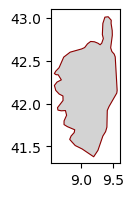

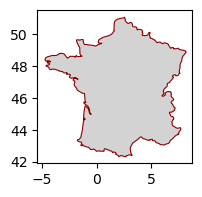

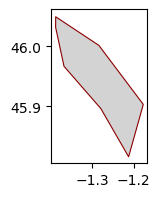

In [450]:
# Check whether modifications seem to make sense
# Visualizing the islands of France
index = mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).index
for i in index:
    mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).iloc[[i], :].plot(edgecolor='darkred', facecolor='lightgrey',
    linewidth=.8,
    figsize=(2, 2))

#### Add region column

In [451]:
# Add a region column to all countries
for key in regions.keys():
    for code in regions[key]:
        indx = mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"].astype(int) == code].index[0]
        mapNaturalEarthGeopandas.at[indx, "REGION"] = key

In [452]:
# Check is the operation was succesful
mapNaturalEarthGeopandas

,SOVEREIGNT,TYPE,NAME,ADM0_A3,UN_A3,geometry,REGION
0,Zimbabwe,Sovereign country,Zimbabwe,ZWE,716,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...",AFRICA
1,Zambia,Sovereign country,Zambia,ZMB,894,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...",AFRICA
2,Yemen,Sovereign country,Yemen,YEM,887,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...",ASIA
3,Vietnam,Sovereign country,Vietnam,VNM,704,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...",ASIA
4,Venezuela,Sovereign country,Venezuela,VEN,862,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...",LATIN AMERICA AND THE CARIBBEAN
...,...,...,...,...,...,...,...
245,France,Dependency,Guadeloupe,GLP,312,"MULTIPOLYGON (((-61.32715 16.23042, -61.44482 ...",LATIN AMERICA AND THE CARIBBEAN
246,France,Dependency,Martinique,MTQ,474,"POLYGON ((-60.82627 14.49448, -60.83662 14.437...",LATIN AMERICA AND THE CARIBBEAN
247,France,Dependency,French Guiana,GUF,254,"POLYGON ((-54.61626 2.32676, -54.60474 2.33579...",LATIN AMERICA AND THE CARIBBEAN
248,Netherlands,Dependency,"Bonaire, Sint Eustatius and Saba",BES,535,"MULTIPOLYGON (((-68.20581 12.14458, -68.25435 ...",LATIN AMERICA AND THE CARIBBEAN


#### Add centroid column

Centroid data source: https://github.com/komsitr/country-centroid/tree/master?tab=readme-ov-file

In [453]:
centroids_countries = []
with open('../data_world/map/country-centroids.json') as f:
    centroids_countries = json.load(f)
print(centroids_countries)

[{'alpha2': 'AD', 'alpha3': 'AND', 'latitude': 42.546245, 'longitude': 1.601554, 'name': 'Andorra'}, {'alpha2': 'AE', 'alpha3': 'ARE', 'latitude': 23.424076, 'longitude': 53.847818, 'name': 'United Arab Emirates'}, {'alpha2': 'AF', 'alpha3': 'AFG', 'latitude': 33.93911, 'longitude': 67.709953, 'name': 'Afghanistan'}, {'alpha2': 'AG', 'alpha3': 'ATG', 'latitude': 17.060816, 'longitude': -61.796428, 'name': 'Antigua and Barbuda'}, {'alpha2': 'AI', 'alpha3': 'AIA', 'latitude': 18.220554, 'longitude': -63.068615, 'name': 'Anguilla'}, {'alpha2': 'AL', 'alpha3': 'ALB', 'latitude': 41.153332, 'longitude': 20.168331, 'name': 'Albania'}, {'alpha2': 'AM', 'alpha3': 'ARM', 'latitude': 40.069099, 'longitude': 45.038189, 'name': 'Armenia'}, {'alpha2': 'AN', 'alpha3': 'ANT', 'latitude': 12.226079, 'longitude': -69.060087, 'name': 'Netherlands Antilles'}, {'alpha2': 'AO', 'alpha3': 'AGO', 'latitude': -11.202692, 'longitude': 17.873887, 'name': 'Angola'}, {'alpha2': 'AQ', 'alpha3': 'ATA', 'latitude': 

In [454]:
print(next((index for (index, d) in enumerate(centroids_countries) if d["alpha3"] == "SSD"), None))

None


In [455]:
from shapely import centroid
print(centroid(mapNaturalEarthGeopandas.at[51 , "geometry"]))

POINT (30.247900018577244 7.308779449223431)


In [456]:
for numericCode in M49:
    indx = mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"].astype(int) == numericCode].index[0]
    letterCode = mapNaturalEarthGeopandas.at[indx, "ADM0_A3"]
    indx_dict = next((index for (index, d) in enumerate(centroids_countries) if d["alpha3"] == letterCode), None)
    # Compute the centorid for those countries that don't have it
    if indx_dict == None:
        print(indx, letterCode, mapNaturalEarthGeopandas.at[indx, "NAME"])
        point = centroid(mapNaturalEarthGeopandas.at[indx , "geometry"])
        mapNaturalEarthGeopandas.at[indx,"longitude"] = point.x
        mapNaturalEarthGeopandas.at[indx,"latitude"] = point.y
        continue
    # print (indx, letterCode, mapNaturalEarthGeopandas.at[indx, "NAME"])
    mapNaturalEarthGeopandas.at[indx,"longitude"] = centroids_countries[indx_dict]["longitude"]
    mapNaturalEarthGeopandas.at[indx,"latitude"] = centroids_countries[indx_dict]["latitude"]

51 SDS S. Sudan
104 SAH W. Sahara
139 PSX Palestine
248 BES Bonaire, Sint Eustatius and Saba
98 CUW Curaçao
164 BLM St-Barthélemy
163 MAF St-Martin
240 SXM Sint Maarten


In [457]:
mapNaturalEarthGeopandas

,SOVEREIGNT,TYPE,NAME,ADM0_A3,UN_A3,geometry,REGION,longitude,latitude
0,Zimbabwe,Sovereign country,Zimbabwe,ZWE,716,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...",AFRICA,29.154857,-19.015438
1,Zambia,Sovereign country,Zambia,ZMB,894,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...",AFRICA,27.849332,-13.133897
2,Yemen,Sovereign country,Yemen,YEM,887,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...",ASIA,48.516388,15.552727
3,Vietnam,Sovereign country,Vietnam,VNM,704,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...",ASIA,108.277199,14.058324
4,Venezuela,Sovereign country,Venezuela,VEN,862,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...",LATIN AMERICA AND THE CARIBBEAN,-66.589730,6.423750
...,...,...,...,...,...,...,...,...,...
245,France,Dependency,Guadeloupe,GLP,312,"MULTIPOLYGON (((-61.32715 16.23042, -61.44482 ...",LATIN AMERICA AND THE CARIBBEAN,-62.067641,16.995971
246,France,Dependency,Martinique,MTQ,474,"POLYGON ((-60.82627 14.49448, -60.83662 14.437...",LATIN AMERICA AND THE CARIBBEAN,-61.024174,14.641528
247,France,Dependency,French Guiana,GUF,254,"POLYGON ((-54.61626 2.32676, -54.60474 2.33579...",LATIN AMERICA AND THE CARIBBEAN,-53.125782,3.933889
248,Netherlands,Dependency,"Bonaire, Sint Eustatius and Saba",BES,535,"MULTIPOLYGON (((-68.20581 12.14458, -68.25435 ...",LATIN AMERICA AND THE CARIBBEAN,-67.658189,12.813614


### Creating Swiss canton map 

#### Add Swiss cantons to the data set

In [458]:
mapCantons.head()

,type_en,name,iso_3166_2,geometry
0,Canton,Valais,CH-VS,"POLYGON ((7.84962 45.93971, 7.84839 45.93808, ..."
1,Canton,Ticino,CH-TI,"POLYGON ((8.72897 46.10824, 8.72389 46.10954, ..."
2,Canton,Graubünden,CH-GR,"POLYGON ((9.22483 46.23119, 9.21575 46.22106, ..."
3,Canton,Schaffhausen,CH-SH,"MULTIPOLYGON (((8.55822 47.80117, 8.58312 47.8..."
4,Canton,Thurgau,CH-TG,"POLYGON ((8.85194 47.67128, 8.85267 47.67079, ..."


In [459]:
# Add columns
mapCantons["SOVEREIGNT"]="Switzerland"
mapCantons["UN_A3"]="-099"
mapCantons["REGION"]="EUROPE"
# Rename columns
mapCantons = mapCantons.rename(columns={"type_en": "TYPE", "name": "NAME", "iso_3166_2": "ADM0_A3"})
# Check results
mapCantons

,TYPE,NAME,ADM0_A3,geometry,SOVEREIGNT,UN_A3,REGION
0,Canton,Valais,CH-VS,"POLYGON ((7.84962 45.93971, 7.84839 45.93808, ...",Switzerland,-099,EUROPE
1,Canton,Ticino,CH-TI,"POLYGON ((8.72897 46.10824, 8.72389 46.10954, ...",Switzerland,-099,EUROPE
2,Canton,Graubünden,CH-GR,"POLYGON ((9.22483 46.23119, 9.21575 46.22106, ...",Switzerland,-099,EUROPE
3,Canton,Schaffhausen,CH-SH,"MULTIPOLYGON (((8.55822 47.80117, 8.58312 47.8...",Switzerland,-099,EUROPE
4,Canton,Thurgau,CH-TG,"POLYGON ((8.85194 47.67128, 8.85267 47.67079, ...",Switzerland,-099,EUROPE
5,Canton,Zürich,CH-ZH,"POLYGON ((8.60162 47.63260, 8.60731 47.65629, ...",Switzerland,-099,EUROPE
6,Canton,Aargau,CH-AG,"POLYGON ((8.25105 47.62200, 8.27699 47.61663, ...",Switzerland,-099,EUROPE
7,Canton,Basel-Stadt,CH-BS,"POLYGON ((7.65967 47.59658, 7.64654 47.57154, ...",Switzerland,-099,EUROPE
8,Canton,Basel-Landschaft,CH-BL,"MULTIPOLYGON (((7.68344 47.54426, 7.72732 47.5...",Switzerland,-099,EUROPE
9,Canton,Sankt Gallen,CH-SG,"POLYGON ((9.55306 47.51689, 9.55495 47.51090, ...",Switzerland,-099,EUROPE


#### Add centroids to Swiss cantons

In [460]:
for i in mapCantons.index:
    point = centroid(mapCantons.at[i , "geometry"])
    mapCantons.at[i,"longitude"] = point.x
    mapCantons.at[i,"latitude"] = point.y
mapCantons

,TYPE,NAME,ADM0_A3,geometry,SOVEREIGNT,UN_A3,REGION,longitude,latitude
0,Canton,Valais,CH-VS,"POLYGON ((7.84962 45.93971, 7.84839 45.93808, ...",Switzerland,-099,EUROPE,7.585501,46.209511
1,Canton,Ticino,CH-TI,"POLYGON ((8.72897 46.10824, 8.72389 46.10954, ...",Switzerland,-099,EUROPE,8.798200,46.294316
2,Canton,Graubünden,CH-GR,"POLYGON ((9.22483 46.23119, 9.21575 46.22106, ...",Switzerland,-099,EUROPE,9.619532,46.657018
3,Canton,Schaffhausen,CH-SH,"MULTIPOLYGON (((8.55822 47.80117, 8.58312 47.8...",Switzerland,-099,EUROPE,8.589105,47.707663
4,Canton,Thurgau,CH-TG,"POLYGON ((8.85194 47.67128, 8.85267 47.67079, ...",Switzerland,-099,EUROPE,9.108873,47.563378
5,Canton,Zürich,CH-ZH,"POLYGON ((8.60162 47.63260, 8.60731 47.65629, ...",Switzerland,-099,EUROPE,8.646470,47.417497
6,Canton,Aargau,CH-AG,"POLYGON ((8.25105 47.62200, 8.27699 47.61663, ...",Switzerland,-099,EUROPE,8.153819,47.412053
7,Canton,Basel-Stadt,CH-BS,"POLYGON ((7.65967 47.59658, 7.64654 47.57154, ...",Switzerland,-099,EUROPE,7.599104,47.564329
8,Canton,Basel-Landschaft,CH-BL,"MULTIPOLYGON (((7.68344 47.54426, 7.72732 47.5...",Switzerland,-099,EUROPE,7.698348,47.456740
9,Canton,Sankt Gallen,CH-SG,"POLYGON ((9.55306 47.51689, 9.55495 47.51090, ...",Switzerland,-099,EUROPE,9.265043,47.233208


### Save data

#### Merge and save data as geojson

In [461]:
mapFinal = pd.concat([mapNaturalEarthGeopandas, mapCantons])
mapFinal

,SOVEREIGNT,TYPE,NAME,ADM0_A3,UN_A3,geometry,REGION,longitude,latitude
0,Zimbabwe,Sovereign country,Zimbabwe,ZWE,716,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...",AFRICA,29.154857,-19.015438
1,Zambia,Sovereign country,Zambia,ZMB,894,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...",AFRICA,27.849332,-13.133897
2,Yemen,Sovereign country,Yemen,YEM,887,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...",ASIA,48.516388,15.552727
3,Vietnam,Sovereign country,Vietnam,VNM,704,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...",ASIA,108.277199,14.058324
4,Venezuela,Sovereign country,Venezuela,VEN,862,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...",LATIN AMERICA AND THE CARIBBEAN,-66.589730,6.423750
...,...,...,...,...,...,...,...,...,...
21,Switzerland,Canton,Nidwalden,CH-NW,-099,"POLYGON ((8.46515 46.99328, 8.48954 46.98158, ...",EUROPE,8.400350,46.926829
22,Switzerland,Canton,Fribourg,CH-FR,-099,"MULTIPOLYGON (((7.21587 47.00419, 7.22517 47.0...",EUROPE,7.081527,46.719285
23,Switzerland,Canton,Obwalden,CH-OW,-099,"MULTIPOLYGON (((8.36815 46.78950, 8.32443 46.7...",EUROPE,8.239370,46.853008
24,Switzerland,Canton,Appenzell Ausserrhoden,CH-AR,-099,"POLYGON ((9.48664 47.39362, 9.48136 47.36848, ...",EUROPE,9.352316,47.367286


In [462]:
mapFinal.rename(columns={"SOVEREIGNT": "sovereignt", "TYPE": "type", "NAME": "name", "ADM0_A3": "iso_3166_2", "UN_A3":"m49", "REGION":"region"})

,sovereignt,type,name,iso_3166_2,m49,geometry,region,longitude,latitude
0,Zimbabwe,Sovereign country,Zimbabwe,ZWE,716,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...",AFRICA,29.154857,-19.015438
1,Zambia,Sovereign country,Zambia,ZMB,894,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...",AFRICA,27.849332,-13.133897
2,Yemen,Sovereign country,Yemen,YEM,887,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...",ASIA,48.516388,15.552727
3,Vietnam,Sovereign country,Vietnam,VNM,704,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...",ASIA,108.277199,14.058324
4,Venezuela,Sovereign country,Venezuela,VEN,862,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...",LATIN AMERICA AND THE CARIBBEAN,-66.589730,6.423750
...,...,...,...,...,...,...,...,...,...
21,Switzerland,Canton,Nidwalden,CH-NW,-099,"POLYGON ((8.46515 46.99328, 8.48954 46.98158, ...",EUROPE,8.400350,46.926829
22,Switzerland,Canton,Fribourg,CH-FR,-099,"MULTIPOLYGON (((7.21587 47.00419, 7.22517 47.0...",EUROPE,7.081527,46.719285
23,Switzerland,Canton,Obwalden,CH-OW,-099,"MULTIPOLYGON (((8.36815 46.78950, 8.32443 46.7...",EUROPE,8.239370,46.853008
24,Switzerland,Canton,Appenzell Ausserrhoden,CH-AR,-099,"POLYGON ((9.48664 47.39362, 9.48136 47.36848, ...",EUROPE,9.352316,47.367286


In [463]:
mapFinal.to_file("map.geojson", driver="GeoJSON")
# convert to topojson

In [493]:
# Open geojson
map_geojson = []
with open('map.geojson') as f:
    map_geojson = json.load(f)

In [497]:
import topojson as tp
topo = tp.Topology(map_geojson, prequantize=False)

In [501]:
# Save topojson
topo.topoquantize(quant_factor=1e6).toposimplify(epsilon=0.0001).to_json(fp="../../website/data/map.topojson")

### TODO: Treat countries bordering Switzerland

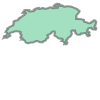

In [464]:
# Create outline of Switzerland
polygonsCantons = []
for i in mapCantons.index:
    polygonsCantons.append(mapCantons.at[i, "geometry"])
outlineSwitzerland = unary_union(polygonsCantons)
outlineSwitzerland

In [465]:
"""
                    Switzerland                                     Neighbouring
DE-FR: [ 7.65966638200004, 47.596579082000076 ] Bleibt: [ 7.5654296875, 47.606542968749999 ]
FR-IT: [ 7.015157918000114, 45.933321431000067 ] Bleibt: [ 6.940820312500023, 45.868359375 ]
IT-AU: [ 10.453811076000136, 46.864427389000056 ] Bleibt: [ 10.479394531250023, 46.855126953124994 ]
AU-LI: [ 9.581202840000032, 47.056870423000063 ] Bleibt: [ 9.595703125, 47.075830078124994 ]
LI-AU: [ 9.504618368000138, 47.24373240200002 ] Bleibt: [ 9.536816406250011, 47.254638671875 ]
AU-DE: [ 9.547481674000068, 47.534547102000047 ] Bleibt: [ 9.650585937500011, 47.52587890625 ]
"""

'\n                    Switzerland                                     Neighbouring\nDE-FR: [ 7.65966638200004, 47.596579082000076 ] Bleibt: [ 7.5654296875, 47.606542968749999 ]\nFR-IT: [ 7.015157918000114, 45.933321431000067 ] Bleibt: [ 6.940820312500023, 45.868359375 ]\nIT-AU: [ 10.453811076000136, 46.864427389000056 ] Bleibt: [ 10.479394531250023, 46.855126953124994 ]\nAU-LI: [ 9.581202840000032, 47.056870423000063 ] Bleibt: [ 9.595703125, 47.075830078124994 ]\nLI-AU: [ 9.504618368000138, 47.24373240200002 ] Bleibt: [ 9.536816406250011, 47.254638671875 ]\nAU-DE: [ 9.547481674000068, 47.534547102000047 ] Bleibt: [ 9.650585937500011, 47.52587890625 ]\n'

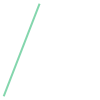

In [466]:
from shapely.geometry import LineString, MultiLineString
line_a = LineString([(7.65966638200004, 47.596579082000076), ( 7.015157918000114, 45.933321431000067)])
snap(line_a,outlineSwitzerland,0)

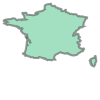

In [467]:
# France
mapNaturalEarthGeopandas.at[160,"geometry"]

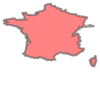

In [468]:
from shapely.ops import snap
snap(mapNaturalEarthGeopandas.at[160,"geometry"], outlineSwitzerland, .15)

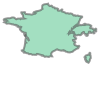

In [469]:
unary_union([mapNaturalEarthGeopandas.at[160,"geometry"], outlineSwitzerland])

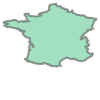

In [470]:
testFrance = mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).iloc[[1], :].at[1, "geometry"]
testFrance

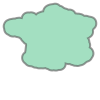

In [471]:
testFrance.buffer(1)

In [472]:
intersection_gridsize = heyhey.intersection(outlineSwitzerland, grid_size=0)
print(intersection_gridsize)

POLYGON ((8.605546724684503 47.734340212320646, 8.614593637032975 47.63813014014473, 8.614311955869352 47.5414960609239, 8.604704311595611 47.44534036539501, 8.585860422551962 47.350560977040544, 8.557956257206843 47.25804296707747, 8.521252390923834 47.16865028946339, 8.47609157265038 47.08321771310047, 8.422895524251146 47.00254302657587, 8.362161002374503 46.92737958823281, 8.29445515962739 46.85842929114108, 8.220410248376862 46.79633600866192, 8.14071771663549 46.74167958181396, 8.09124018693488 46.71436084751448, 8.026011643250076 46.65970512799264, 7.949654182666962 46.60694990566117, 7.868734674148298 46.561500940754996, 7.817329023340621 46.53861202394071, 7.831970103268251 46.51947168813504, 7.891144507543785 46.420149362789594, 7.908332007543786 46.387092722164596, 7.9481982742272725 46.300584133069655, 7.97965287038027 46.21067493672507, 8.002410406715386 46.118180884232856, 8.013308812015298 46.0440461370833, 8.010652710000102 46.02969797800007, 8.008792358000107 46.027682

<Axes: >

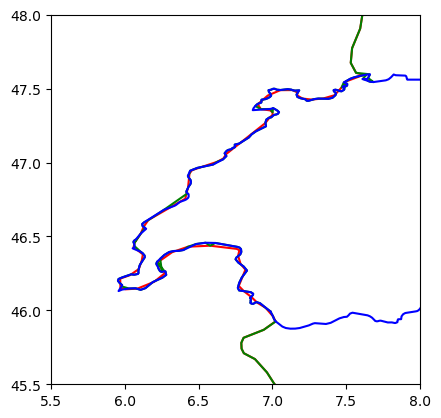

In [473]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.set_ylim((45.5,48))
ax.set_xlim((5.5,8))

dfTest = pd.DataFrame({'geometry': [mapNaturalEarthGeopandas.at[160,"geometry"], snap(mapNaturalEarthGeopandas.at[160,"geometry"], outlineSwitzerland, .025), outlineSwitzerland]})
df = gpd.GeoDataFrame(dfTest)
df.boundary.plot(ax=ax, facecolor="none", color=['r', 'g', 'b'])

In [474]:
mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "756"]

,SOVEREIGNT,TYPE,NAME,ADM0_A3,UN_A3,geometry,REGION,longitude,latitude
47,Switzerland,Sovereign country,Switzerland,CHE,756,"POLYGON ((9.52402 47.52422, 9.55439 47.51113, ...",EUROPE,8.227512,46.818188


In [475]:
#mapNaturalEarthGeopandas.at[160,"geometry"] = snap(mapNaturalEarthGeopandas.at[160,"geometry"], outlineSwitzerland, 0)
#mapNaturalEarthGeopandas.drop([47])

In [476]:
# dfFinal = pd.concat([mapNaturalEarthGeopandas, mapCantons])
#dfFinal = pd.concat([mapNaturalEarthGeopandas, gpd.GeoDataFrame(pd.DataFrame({'geometry': [unary_union(polygonsCantons)]}))])

In [477]:
dfFinal

,SOVEREIGNT,TYPE,NAME,ADM0_A3,UN_A3,geometry,REGION
0,Zimbabwe,Sovereign country,Zimbabwe,ZWE,716,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344...",AFRICA
1,Zambia,Sovereign country,Zambia,ZMB,894,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643...",AFRICA
2,Yemen,Sovereign country,Yemen,YEM,887,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16...",ASIA
3,Vietnam,Sovereign country,Vietnam,VNM,704,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ...",ASIA
4,Venezuela,Sovereign country,Venezuela,VEN,862,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9...",LATIN AMERICA AND THE CARIBBEAN
...,...,...,...,...,...,...,...
246,France,Dependency,Martinique,MTQ,474,"POLYGON ((-60.82627 14.49448, -60.83662 14.437...",LATIN AMERICA AND THE CARIBBEAN
247,France,Dependency,French Guiana,GUF,254,"POLYGON ((-54.61626 2.32676, -54.60474 2.33579...",LATIN AMERICA AND THE CARIBBEAN
248,Netherlands,Dependency,"Bonaire, Sint Eustatius and Saba",BES,535,"MULTIPOLYGON (((-68.20581 12.14458, -68.25435 ...",LATIN AMERICA AND THE CARIBBEAN
249,New Zealand,Dependency,Tokelau,TKL,772,"MULTIPOLYGON (((-172.47915 -8.58076, -172.4836...",OCEANIA


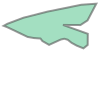

In [478]:
mapCantons.at[7, "geometry"]


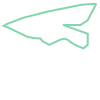

In [479]:
mapCantons.at[7, "geometry"].exterior

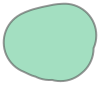

In [480]:
mapCantons.at[7, "geometry"].buffer(.15)

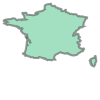

In [481]:
mapNaturalEarthGeopandas.at[160,"geometry"]

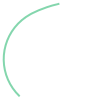

In [482]:
mapNaturalEarthGeopandas.at[160,"geometry"].intersection(mapCantons.at[7, "geometry"].buffer(.15).exterior)

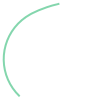

In [483]:
mapCantons.at[7, "geometry"].buffer(.15).exterior.intersection(mapNaturalEarthGeopandas.at[160,"geometry"])

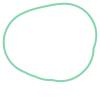

In [484]:
mapCantons.at[7, "geometry"].buffer(.15).exterior

In [485]:
from shapely.ops import snap
from shapely.geometry import LineString
square = Polygon([(1,1), (2, 1), (2, 2), (1, 2), (1, 1)])
line = LineString([(0,0), (0.8, 0.8), (1.8, 0.95), (2.6, 0.5)])
result = snap(line, square, 0.5)

<Axes: >

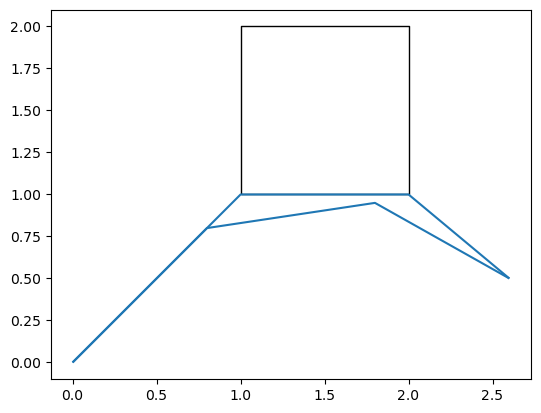

In [486]:
dfTest = pd.DataFrame({'geometry': [square, line, result]})
df = gpd.GeoDataFrame(dfTest)
df.plot(facecolor="none")

In [487]:
# df3.to_file("test.geojson", driver="GeoJSON") 
# mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "832"]

# new = mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True).iloc[[0], :]
# print(new)

# mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "250"].explode(ignore_index=True)

# mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "554"]

# mapNaturalEarthGeopandas.loc[mapNaturalEarthGeopandas["UN_A3"] == "554"].plot(edgecolor='darkred', facecolor='lightgrey',
#    linewidth=.8,
#    figsize=(7, 7))

In [488]:
# Write file 
# mapNaturalEarthGeopandas.to_file("map.geojson", driver="GeoJSON")

# Check file
# map = gpd.read_file("map.geojson")
# print(map)
# print(len(M49))

In [489]:
"""
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt

def replace_polygon_segment(polygon, p1, p2, new_segment):
    # Ensure the input polygon is closed
    if not polygon.is_closed:
        polygon = Polygon(polygon.exterior.coords)

    coords = list(polygon.exterior.coords)
    
    # Find the indices of p1 and p2 in the polygon coordinates
    try:
        idx1 = coords.index(p1)
        idx2 = coords.index(p2)
    except ValueError as e:
        raise ValueError("The points p1 and p2 must be vertices of the polygon") from e

    if idx1 > idx2:
        idx1, idx2 = idx2, idx1

    # Extract the segments before, between, and after the points
    before_segment = coords[:idx1 + 1]
    after_segment = coords[idx2:]
    
    # Create the new coordinates
    new_coords = before_segment + list(new_segment.coords) + after_segment

    # Create the new polygon
    new_polygon = Polygon(new_coords)

    return new_polygon

# Define the original polygon and the points to replace the segment between
polygon = Polygon([(0, 0), (4, 0), (4, 4), (0, 4), (0, 0)])
p1 = (4, 0)
p2 = (4, 4)

# Define the new segment as a LineString
new_segment = LineString([(4, 0), (2, 2), (4, 4)])

# Replace the segment and get the new polygon
new_polygon = replace_polygon_segment(polygon, p1, p2, new_segment)

# Plotting the old and new polygons
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot original polygon
x, y = polygon.exterior.xy
ax[0].fill(x, y, alpha=0.5, fc='r', ec='black')
ax[0].set_title('Original Polygon')

# Plot new polygon
x, y = new_polygon.exterior.xy
ax[1].fill(x, y, alpha=0.5, fc='g', ec='black')
ax[1].set_title('Polygon with Replaced Segment')

plt.show()
"""

'\nfrom shapely.geometry import Polygon, LineString, Point\nimport matplotlib.pyplot as plt\n\ndef replace_polygon_segment(polygon, p1, p2, new_segment):\n    # Ensure the input polygon is closed\n    if not polygon.is_closed:\n        polygon = Polygon(polygon.exterior.coords)\n\n    coords = list(polygon.exterior.coords)\n    \n    # Find the indices of p1 and p2 in the polygon coordinates\n    try:\n        idx1 = coords.index(p1)\n        idx2 = coords.index(p2)\n    except ValueError as e:\n        raise ValueError("The points p1 and p2 must be vertices of the polygon") from e\n\n    if idx1 > idx2:\n        idx1, idx2 = idx2, idx1\n\n    # Extract the segments before, between, and after the points\n    before_segment = coords[:idx1 + 1]\n    after_segment = coords[idx2:]\n    \n    # Create the new coordinates\n    new_coords = before_segment + list(new_segment.coords) + after_segment\n\n    # Create the new polygon\n    new_polygon = Polygon(new_coords)\n\n    return new_polygon

In [490]:
"""
from shapely.geometry import Polygon, LineString

def get_segment_between_points(polygon, p1, p2):
    # Ensure the input polygon is closed
    if not polygon.is_closed:
        polygon = Polygon(polygon.exterior.coords)
    
    coords = list(polygon.exterior.coords)
    
    # Find the indices of p1 and p2 in the polygon coordinates
    try:
        idx1 = coords.index(p1)
        idx2 = coords.index(p2)
    except ValueError as e:
        raise ValueError("The points p1 and p2 must be vertices of the polygon") from e

    if idx1 > idx2:
        idx1, idx2 = idx2, idx1

    # Extract the coordinates between the points
    segment_coords = coords[idx1:idx2+1]
    
    # Create a LineString from the segment coordinates
    segment = LineString(segment_coords)
    
    return segment

# Example usage:
polygon = Polygon([(0, 0), (4, 0), (4, 4), (0, 4), (0, 0)])
p1 = (0, 4)
p2 = (4, 0)

segment = get_segment_between_points(polygon, p1, p2)
print(segment)  # LINESTRING (4 0, 4 4, 0 4)
"""


'\nfrom shapely.geometry import Polygon, LineString\n\ndef get_segment_between_points(polygon, p1, p2):\n    # Ensure the input polygon is closed\n    if not polygon.is_closed:\n        polygon = Polygon(polygon.exterior.coords)\n    \n    coords = list(polygon.exterior.coords)\n    \n    # Find the indices of p1 and p2 in the polygon coordinates\n    try:\n        idx1 = coords.index(p1)\n        idx2 = coords.index(p2)\n    except ValueError as e:\n        raise ValueError("The points p1 and p2 must be vertices of the polygon") from e\n\n    if idx1 > idx2:\n        idx1, idx2 = idx2, idx1\n\n    # Extract the coordinates between the points\n    segment_coords = coords[idx1:idx2+1]\n    \n    # Create a LineString from the segment coordinates\n    segment = LineString(segment_coords)\n    \n    return segment\n\n# Example usage:\npolygon = Polygon([(0, 0), (4, 0), (4, 4), (0, 4), (0, 0)])\np1 = (0, 4)\np2 = (4, 0)\n\nsegment = get_segment_between_points(polygon, p1, p2)\nprint(segmen